# 2ª Entrega do Projeto [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/SimpleANPR/anpr/blob/2a_Entrega_ANPR.ipynb)

Esse Jupyter Notebook contém uma demonstração da segunda etapa do projeto: algoritmos e técnicas de pré-processamento. O problema escolhido pela equipe foi o reconhecimento automático de placas veiculares. 

In [1]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [2]:
if IN_COLAB:
    # Configurando o ambiente para execução no colab
    !git clone https://github.com/SimpleANPR/anpr
    %pip install -r anpr/requirements.txt
    import sys
    sys.path.append("/content/anpr")

## Dataset

O dataset selecionado foi o conjunto de imagens de benchmark utilizados pelo OpenALPR (https://github.com/openalpr/benchmarks). Ao todo, temos um total de 444 imagens anotados de veículos e suas placas.

In [3]:
from anpr.datasets.open_alpr import OpenALPRDataset
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import plotly.express as px

In [4]:
# Acessando o dataset (realiza o download automático das imagens)
ds = OpenALPRDataset()
print(f'Quantidade total de imagens: {ds.total_images()}')

Quantidade total de imagens: 444


In [5]:
def show_image_with_plate(img):
    """Método utilitário que mostra uma
    imagem anotada do dataset OpenALPR.

    Args:
        img (OpenALPRImage): imagem anotada.
    """
    print(f'Placa: {img.plate_text}')
    _, ax = plt.subplots()
    ax.imshow(img.image)
    x, y, w, h = img.plate_rect
    ax.add_patch(patches.Rectangle((x, y), w, h, 
                                linewidth=1, 
                                edgecolor='r', 
                                facecolor='none'))

Placa: RK819AM


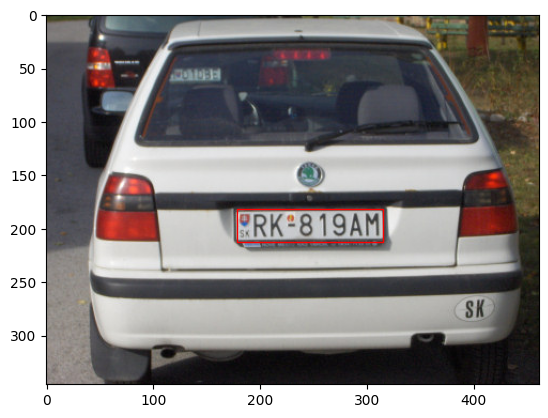

In [6]:
# Exemplo de uma imagem anotada do dataset
img = ds.image_at(200)
show_image_with_plate(img)

In [7]:
# Coletando medidas estatísticas do dataset
data = {
    'resolution': [],
    'plate_area': []
}

for i in range(ds.total_images()):
    annotated_img = ds.image_at(i)
    h, w, _ = annotated_img.image.shape
    _, _, p_w, p_h = annotated_img.plate_rect

    # Adicionando essa resolução
    target_res = f'{w}x{h}'
    data['resolution'].append(target_res)

    # Adicionando área normalizada
    image_area = h * w
    plate_area = p_w * p_h
    norm_area = plate_area / image_area
    data['plate_area'].append(round(norm_area * 100, 2))


In [8]:
# Histograma das resoluções do dataset
df = pd.DataFrame({'resolution': data['resolution']})
df = df.sort_values(by='resolution')
px.histogram(df, x='resolution')

# Da figura, conseguimos perceber que existe uma quantidade
#   variada de resoluções no dataset. Todavia, muitas imagens
#   possuem resolução 1280x720.

In [9]:
# Distribuição das áreas dos retângulos das placas
df = pd.DataFrame({'plate_area': data['plate_area']})
px.histogram(df, x='plate_area', nbins=10)

# A figura indica a % da área ocupada pela placa com relação
#   à área total da imagem. Conseguimos perceber que a grande maioria
#   das placas ocupa <5% da área total da imagem, todavia
#   existem algumas imagem onde a placa ocupa >15% da área
#   total.

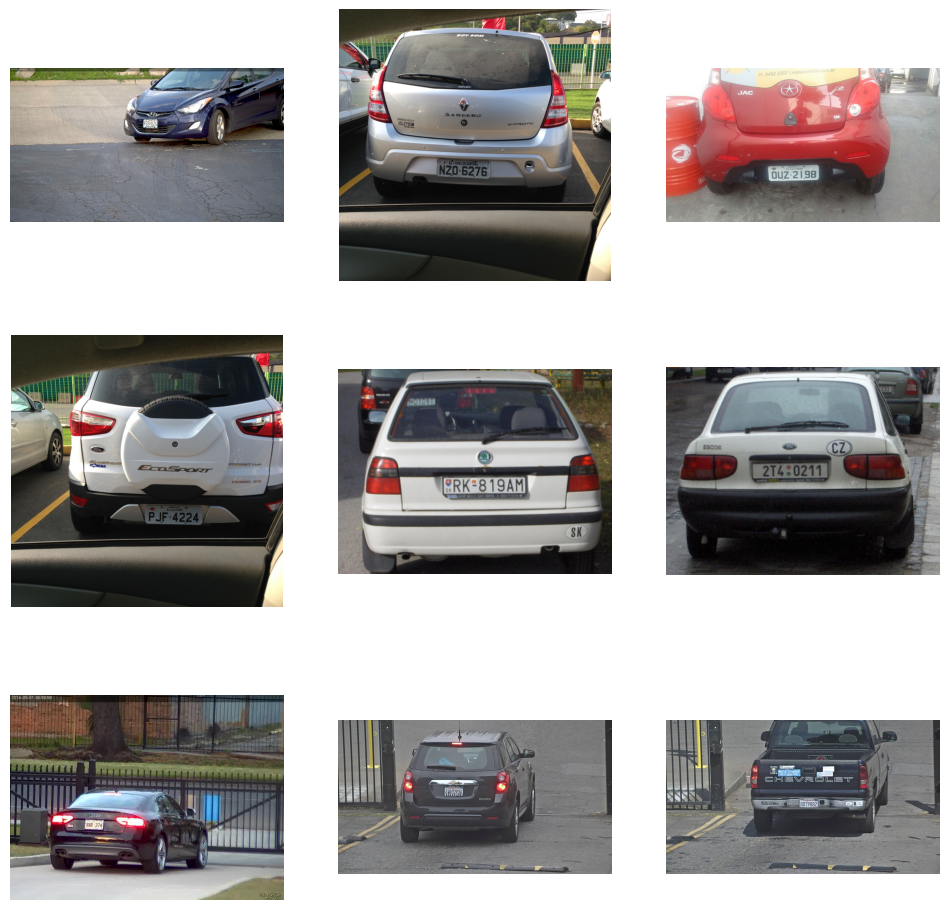

In [10]:
# Exemplos de imagens
imgs = [ds.image_at(i).image 
        for i in [0, 50, 80, 100, 200, 
                  240, 300, 400, 440]]
fig, axs = plt.subplots(3, 3,
                        figsize=(12, 12),
                        facecolor='w',
                        edgecolor='k')
axs = axs.ravel()

for i, img_ in enumerate(imgs):
  axs[i].axis("off")
  axs[i].imshow(img_)


## Pré-processamento: Escala de Cinza


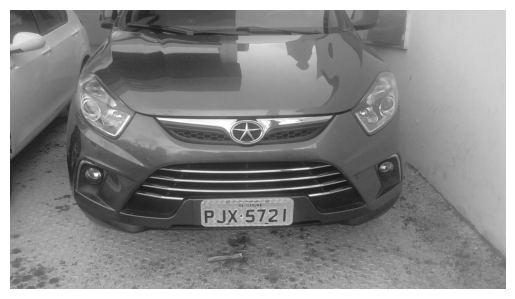

In [11]:
from anpr.generic.grayscale import GrayScale

plt.axis('off')
plt.imshow(GrayScale().process(ds.image('PJX5721.jpg').image), cmap='gray')

## Pré-processamento: Redução de Ruído e Suavização

## Pré-processamento: Ajuste de Brilho e Contraste

## Pré-processamento: Filtros Morfológicos

## Interpolação: Aumentando/Diminuindo Imagens